<a href="https://colab.research.google.com/github/howsam/pytorch-course-free/blob/main/week_2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='#FFE15D'><b>💎 Week 2: Linear Regression with torch API</b></font>
### Pytorch Free Course [webpage](https://howsam.org/downloads/pytorch-courset/)

### Source Codes on Github [pytorch-course-free](https://github.com/howsam/pytorch-course-free.git)

### by Howsam AI Academy www.howsam.org


## 🟪 **Increasing the output font size in Colab cells**

In [ ]:
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 30px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

In [ ]:
a = 3
a

3

## 🟥 **Step 0: Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch

In [ ]:
torch.__version__

'2.3.0+cu121'

## 🟥 **Step 1: Dataset**

https://www.kaggle.com/code/ybifoundation/simple-linear-regression

<table border="1" align="left">
  <tr>
    <th align="center">Experience Years</th>
    <th align="center">Salary</th>
  </tr>
  <tr>
    <td align="center">1.1</td>
    <td align="center">39343</td>
  </tr>
  <tr>
    <td align="center">1.2</td>
    <td align="center">42774</td>
  </tr>
  <tr>
    <td align="center">1.3</td>
    <td align="center">46205</td>
  </tr>
  <tr>
    <td align="center">...</td>
    <td align="center">...</td>
  </tr>
  <tr>
    <td align="center">10.3</td>
    <td align="center">122391</td>
  </tr>
  <tr>
    <td align="center">10.5</td>
    <td align="center">121872</td>
  </tr>
</table>


In [ ]:
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
salary

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [ ]:
X = salary['Experience Years'].values
y = salary['Salary'].values
X, y

(array([ 1.1,  1.2,  1.3,  1.5,  2. ,  2.2,  2.5,  2.9,  3. ,  3.2,  3.2,
         3.5,  3.7,  3.8,  3.9,  4. ,  4. ,  4.1,  4.3,  4.5,  4.7,  4.9,
         5.1,  5.3,  5.5,  5.9,  6. ,  6.2,  6.5,  6.8,  7.1,  7.9,  8.2,
         8.5,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343,  42774,  46205,  37731,  43525,  39891,  48266,  56642,
         60150,  54445,  64445,  60000,  57189,  60200,  63218,  55794,
         56957,  57081,  59095,  61111,  64500,  67938,  66029,  83088,
         82200,  81363,  93940,  91000,  90000,  91738,  98273, 101302,
        113812, 111620, 109431, 105582, 116969, 112635, 122391, 121872]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28,), (28,), (12,), (12,))

In [ ]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28, 1), (28, 1), (12, 1), (12, 1))

In [ ]:
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)

In [ ]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)

In [ ]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [ ]:
y_scaler.inverse_transform(y_test)

array([[ 83088.],
       [111620.],
       [ 93940.],
       [ 56642.],
       [ 67938.],
       [121872.],
       [ 37731.],
       [ 90000.],
       [116969.],
       [105582.],
       [ 60150.],
       [ 66029.]])

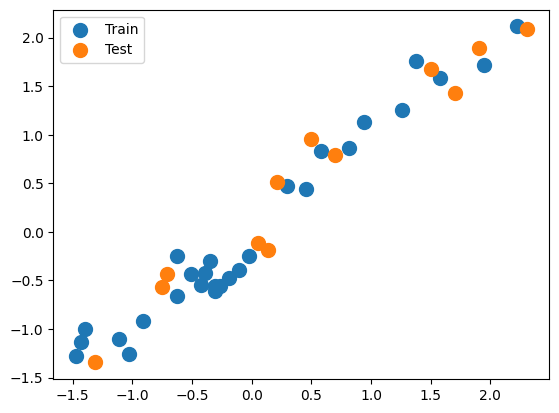

In [ ]:
plt.scatter(X_train, y_train, s=100)
plt.scatter(X_test, y_test, s=100)

plt.legend(['Train', 'Test']);

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([28, 1]),
 torch.Size([28, 1]),
 torch.Size([12, 1]),
 torch.Size([12, 1]))

## 🟥 **Step 2: Model**

### 🟧 **Functional**

In [ ]:
def linear_regression(x, theta0, theta1):
  y_hat = x * theta1 + theta0
  return y_hat

In [ ]:
theta0 = torch.randn(1)
theta1 = torch.randn(1)
print(theta0, theta1)

y_hat = linear_regression(X_train, theta0, theta1)
y_hat.shape

tensor([0.0003]) tensor([0.0063])


torch.Size([28, 1])

In [ ]:
linear_regression(1, 2, -2)

0

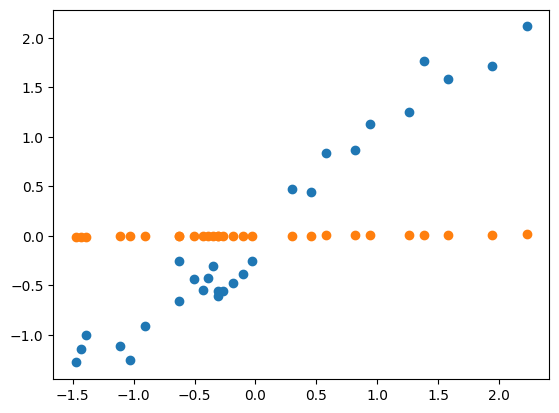

In [ ]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_hat)

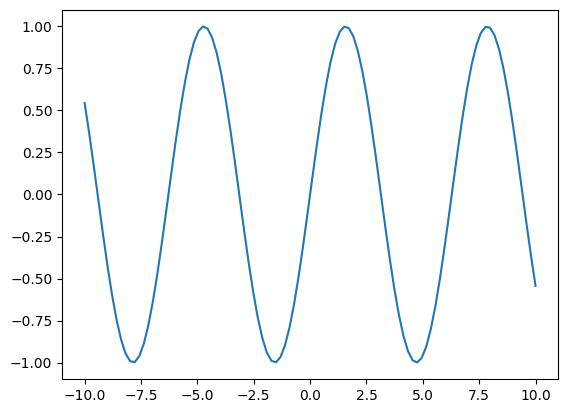

In [ ]:
Xr = np.linspace(-10, 10, 100)
yr = np.sin(Xr)

plt.plot(Xr, yr)

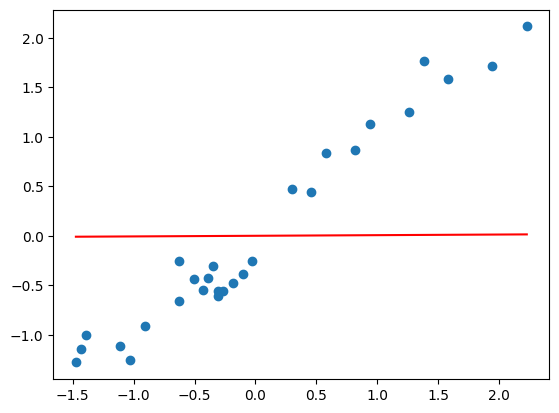

In [ ]:
Xr = torch.linspace(X_train.min(), X_train.max(), 100).unsqueeze(1)
y_hat = linear_regression(Xr, theta0, theta1)

plt.scatter(X_train, y_train)
plt.plot(Xr, y_hat, color='red')

### 🟧 **OO**

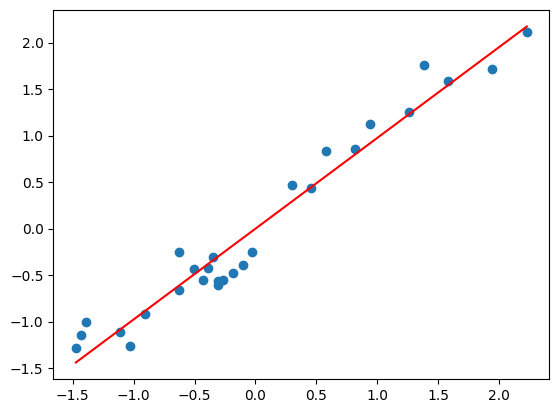

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(Xr)

plt.scatter(X_train, y_train)
plt.plot(Xr, y_hat, color='red')

In [ ]:
class LinearRegression:

  def __init__(self):
    self.theta0 = torch.randn(1)
    self.theta1 = torch.randn(1)

  def __call__(self, x):
    y_hat = x * self.theta1 + self.theta0
    return y_hat

  def __repr__(self):
    return "Linear Regression by Howsam AI"

In [ ]:
model = LinearRegression()
model.theta0, model.theta1

(tensor([-1.0005]), tensor([-1.3062]))

In [ ]:
model(X_train).shape

torch.Size([28, 1])

## 🟥 **Step 3: Loss**

In [ ]:
y_hat = model(X_train)
y_hat.shape

torch.Size([28, 1])

In [ ]:
def mse(y_hat, y):
  return torch.mean((y_hat - y)**2)

In [ ]:
loss = mse(y_hat, y_train)
loss

tensor(6.2596)

In [ ]:
loss = (x*theta1 + theta0 - y)**2
# z = (x+y)**2

In [ ]:
theta0 = 0
theta1 = torch.linspace(-10, 10, 100)

loss = torch.zeros(len(theta1))

for i, t1 in enumerate(theta1):
  y_hat = linear_regression(X_train, theta0, theta1=t1)
  loss[i] = mse(y_hat, y_train)

loss.shape

torch.Size([100])

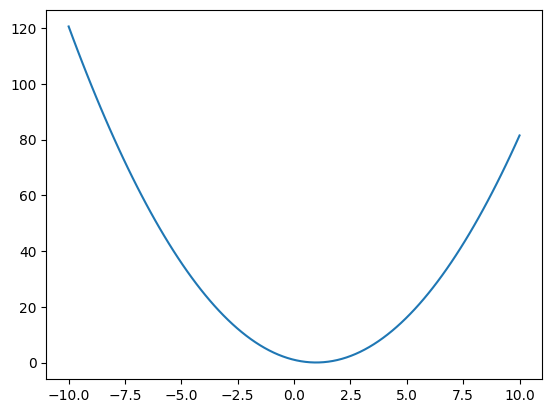

In [ ]:
plt.plot(theta1, loss)

In [ ]:
idx = torch.argmin(loss)
theta1[idx]

tensor(0.9091)

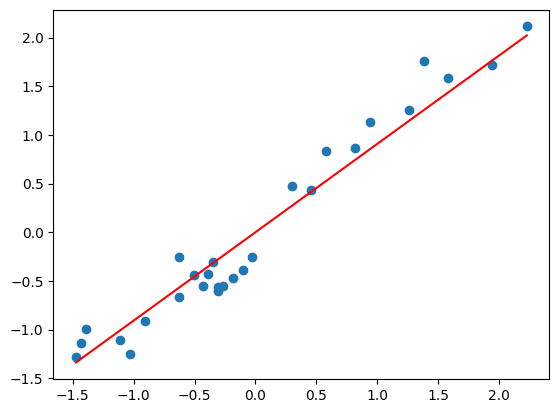

In [ ]:
plt.scatter(X_train, y_train)

y_hat = linear_regression(Xr, theta0=0, theta1=theta1[idx])
plt.plot(Xr, y_hat, color='r')

### 🟧 **Loss landscape**

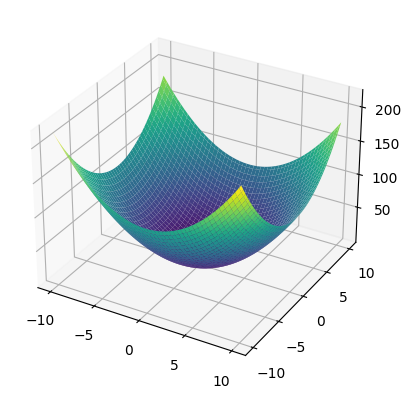

In [ ]:
theta0_vals = torch.linspace(-10, 10, 100)
theta1_vals = torch.linspace(-10, 10, 100)
theta0, theta1 = torch.meshgrid(theta0_vals, theta1_vals)

loss = torch.zeros_like(theta0)

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t0 = theta0_vals[i]
        t1 = theta1_vals[j]
        loss[i, j] = torch.mean((t0 + t1 * X_train - y_train)** 2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0, theta1, loss, cmap='viridis');

<a list of 12 text.Text objects>

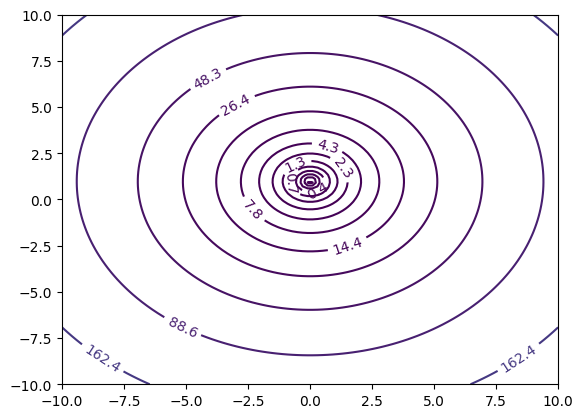

In [ ]:
fig = plt.figure()
CS = plt.contour(theta0, theta1, loss, levels=torch.logspace(-2, 3, 20))
plt.clabel(CS, inline=1, fontsize=10)

In [ ]:
idx = torch.argmin(loss.flatten())
theta0.flatten()[idx], theta1.flatten()[idx]

(tensor(0.1010), tensor(0.9091))

## 🟥 **Step 4: Optimizer**

In [ ]:
def gradient_descent(x, y, y_hat, eta, theta0, theta1):
  # gradient
  error = y_hat - y
  grad_theta0 = 2*torch.mean(error)
  grad_theta1 = 2*torch.mean(x*error)
  # update
  theta0 -= eta * grad_theta0
  theta1 -= eta * grad_theta1
  return theta0, theta1

In [ ]:
y_hat = model(X_train)
loss = mse(y_hat, y_train)
print(loss)
gradient_descent(X_train, y_train, y_hat, 0.5, model.theta0, model.theta1)

tensor(0.0455)


(tensor([2.1287e-09]), tensor([0.9770]))

In [ ]:
def calc_gradient(x, y, y_hat):
  error = y_hat - y
  grad_theta0 = 2*torch.mean(error)
  grad_theta1 = 2*torch.mean(x*error)
  return grad_theta0, grad_theta1

In [ ]:
def update(theta0, theta1, eta, grad_theta0, grad_theta1):
  theta0 -= eta * grad_theta0
  theta1 -= eta * grad_theta1
  return theta0, theta1

In [ ]:
y_hat = model(X_train)

loss = mse(y_hat, y_train)
print(loss)

grad_theta0, grad_theta1 = calc_gradient(X_train, y_train, y_hat)
print(grad_theta0, grad_theta1)

model.theta0, model.theta1 = update(model.theta0, model.theta1, 0.5, grad_theta0, grad_theta1)
model.theta0, model.theta1

tensor(0.0455)
tensor(1.2772e-08) tensor(6.5991e-08)


(tensor([-4.2575e-09]), tensor([0.9770]))

## 🟥 **Step 5: Train Lꝏp**

In [ ]:
theta0 = torch.randn(1)
theta1 = torch.randn(1)
print(theta0, theta1)

eta = 0.1
N = 100

tensor([1.4930]) tensor([0.5812])


In [ ]:
for iter in range(N):
  # model
  y_hat = linear_regression(X_train, theta0, theta1)

  # loss
  loss = mse(y_hat, y_train)

  # gradient
  grad_theta0, grad_theta1 = calc_gradient(X_train, y_train, y_hat)

  # update
  theta0, theta1 = update(theta0, theta1, eta, grad_theta0, grad_theta1)

  print(f'Iter: {iter}/{N} , Loss: {loss:.2f} , g_th0: {grad_theta0:.2f} , g_th1: {grad_theta1:.2f} , th0: {theta0.item():.2f} , th1: {theta1.item():.2f}')

Iter: 0/100 , Loss: 2.43 , g_th0: 2.99 , g_th1: -0.79 , th0: 1.19 , th1: 0.66
Iter: 1/100 , Loss: 1.57 , g_th0: 2.39 , g_th1: -0.63 , th0: 0.96 , th1: 0.72
Iter: 2/100 , Loss: 1.02 , g_th0: 1.91 , g_th1: -0.51 , th0: 0.76 , th1: 0.77
Iter: 3/100 , Loss: 0.67 , g_th0: 1.53 , g_th1: -0.41 , th0: 0.61 , th1: 0.81
Iter: 4/100 , Loss: 0.45 , g_th0: 1.22 , g_th1: -0.32 , th0: 0.49 , th1: 0.85
Iter: 5/100 , Loss: 0.30 , g_th0: 0.98 , g_th1: -0.26 , th0: 0.39 , th1: 0.87
Iter: 6/100 , Loss: 0.21 , g_th0: 0.78 , g_th1: -0.21 , th0: 0.31 , th1: 0.89
Iter: 7/100 , Loss: 0.15 , g_th0: 0.63 , g_th1: -0.17 , th0: 0.25 , th1: 0.91
Iter: 8/100 , Loss: 0.11 , g_th0: 0.50 , g_th1: -0.13 , th0: 0.20 , th1: 0.92
Iter: 9/100 , Loss: 0.09 , g_th0: 0.40 , g_th1: -0.11 , th0: 0.16 , th1: 0.93
Iter: 10/100 , Loss: 0.07 , g_th0: 0.32 , g_th1: -0.08 , th0: 0.13 , th1: 0.94
Iter: 11/100 , Loss: 0.06 , g_th0: 0.26 , g_th1: -0.07 , th0: 0.10 , th1: 0.95
Iter: 12/100 , Loss: 0.06 , g_th0: 0.21 , g_th1: -0.05 , th0: 

## 🟥 **Step 6: Test**

In [ ]:
theta0, theta1

(tensor([7.4540e-09]), tensor([0.9770]))

In [ ]:
y_hat = linear_regression(X_test, theta0, theta1)
y_hat

tensor([[ 0.2104],
        [ 1.4669],
        [ 0.4852],
        [-0.7321],
        [ 0.0533],
        [ 2.2523],
        [-1.2818],
        [ 0.6816],
        [ 1.8596],
        [ 1.6633],
        [-0.6928],
        [ 0.1318]])

In [ ]:
mse(y_hat, y_test)

tensor(0.0560)

In [ ]:
y_scaler.inverse_transform(y_hat)

array([[ 75797.44105859],
       [106548.23420451],
       [ 82524.17666041],
       [ 52734.34501399],
       [ 71953.59186977],
       [125767.4831571 ],
       [ 39280.87308103],
       [ 87328.98816923],
       [116157.86013946],
       [111353.04425468],
       [ 53695.30760749],
       [ 73875.51660093]])

In [ ]:
y_scaler.inverse_transform(y_test)

array([[ 83087.99972817],
       [111619.99872961],
       [ 93939.99947148],
       [ 56641.9999201 ],
       [ 67937.99997281],
       [121872.00219424],
       [ 37731.00145335],
       [ 90000.00032653],
       [116969.00125466],
       [105582.00002812],
       [ 60149.99984815],
       [ 66028.99993692]])

## 🟪 **Exercise: US Health Insurance Dataset**

https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset